In [41]:
import json
import cs_vqe_classes.cs_vqe_circuit as cs_circ
import utils.plotting_tools as plot
import utils.qonversion_tools as qonvert
from utils.molecule_tools import get_molecule
import utils.cs_vqe_tools as cs_tools
from matplotlib import pyplot as plt
import numpy as np
from qiskit.aqua.components.optimizers import IMFIL, NELDER_MEAD, POWELL, NFT, SPSA, SLSQP
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit.algorithms import VQE
import utils.linalg_tools as la

In [3]:
with open('data/model_data.json', 'r') as json_file:
    model_data = json.load(json_file)
    
model_data.keys()

dict_keys(['H2_3-21G_SINGLET', 'H6_STO-3G_SINGLET', 'H2_6-31G_SINGLET', 'H2_6-311G_SINGLET', 'H3+_STO-3G_SINGLET', 'H3+_3-21G_SINGLET', 'H3+_STO-3G_SINGLET_alt', 'HeH+_3-21G_SINGLET', 'HeH+_3-21G_SINGLET_alt', 'HeH+_6-311G_SINGLET', 'H2O_STO-3G_SINGLET', 'H2O_STO-3G_SINGLET_alt', 'BeH+_STO-3G_SINGLET', 'LiH_STO-3G_SINGLET', 'CH+_STO-3G_SINGLET', 'HF_STO-3G_SINGLET', 'B+_STO-3G_SINGLET', 'N+_STO-3G_SINGLET', 'OH+_STO-3G_SINGLET', 'CH2_STO-3G_SINGLET', 'BeH2_STO-3G_SINGLET', 'Be_STO-3G_SINGLET', 'C_STO-3G_SINGLET', 'NH_STO-3G_SINGLET'])

In [4]:
speciesname = "Be_STO-3G_SINGLET"
molecule    = model_data[speciesname]

ham         = molecule['ham']
uccsd       = molecule['uccsd']
hf_config   = molecule['hf_config']
num_qubits  = molecule['num_qubits']
terms_noncon= molecule['terms_noncon']

In [5]:
mol_circ = cs_circ.cs_vqe_circuit(hamiltonian = ham,
                                  terms_noncon= terms_noncon,
                                  num_qubits  = num_qubits,
                                  hf_config   = hf_config)
num_sim_q = mol_circ.chem_acc_num_q

In [6]:
mol_circ.build_circuit(uccsd, num_sim_q).draw()

/home/tim/anaconda3/lib/python3.7/site-packages/qiskit/circuit/quantumcircuit.py:942: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)


┌───┐ ┌───┐                                 ┌───┐┌─────┐┌───┐     »
q_0: ─┤ X ├─┤ H ├──■───────────────────────────■──┤ H ├┤ Sdg ├┤ H ├──■──»
     ┌┴───┴┐├───┤┌─┴─┐                       ┌─┴─┐└───┘└─────┘└───┘┌─┴─┐»
q_1: ┤ Sdg ├┤ H ├┤ X ├──■─────────────────■──┤ X ├─────────────────┤ X ├»
     └┬───┬┘└───┘└───┘┌─┴─┐┌───────────┐┌─┴─┐└───┘                 └───┘»
q_2: ─┤ X ├───────────┤ X ├┤ Rz(-P[0]) ├┤ X ├───────────────────────────»
      └───┘           └───┘└───────────┘└───┘                           »
«                       ┌───┐┌───┐┌───┐                       ┌───┐┌─────┐┌───┐»
«q_0: ───────────────■──┤ H ├┤ S ├┤ H ├──■─────────────────■──┤ H ├┤ Sdg ├┤ H ├»
«     ┌───────────┐┌─┴─┐└───┘└───┘└───┘┌─┴─┐┌───────────┐┌─┴─┐└───┘└─────┘└───┘»
«q_1: ┤ Rz(-P[1]) ├┤ X ├───────────────┤ X ├┤ Rz(-P[2]) ├┤ X ├─────────────────»
«     └───────────┘└───┘               └───┘└───────────┘└───┘                 »
«q_2: ─────────────────────────────────────────────────────────────────────────»
«                                                                              »
«                                        ┌───┐┌───┐┌───┐                       »
«q_0: ──■────────────────────────────■───┤ H ├┤ S ├┤ H ├──■────────────────────»
«     ┌─┴─┐                        ┌─┴─┐ ├───┤├───┤├───┤┌─┴─┐                  »
«q_1: ┤ X ├──■─────────────────■───┤ X ├─┤ H ├┤ S ├┤ H ├┤ X ├──■───────────────»
«     └───┘┌─┴─┐┌───────────┐┌─┴─┐┌┴───┴┐├───┤└───┘└───┘└───┘┌─┴─┐┌───────────┐»
«q_2: ─────┤ X ├┤ Rz(-P[3]) ├┤ X ├┤ Sdg ├┤ H ├───────────────┤ X ├┤ Rz(-P[4]) ├»
«          └───┘└───────────┘└───┘└─────┘└───┘               └───┘└───────────┘»
«                                                     ┌───┐┌─────┐┌───┐     »
«q_0: ───────■────■────────────────────────────────■──┤ H ├┤ Sdg ├┤ H ├──■──»
«          ┌─┴─┐┌─┴─┐                            ┌─┴─┐└───┘└─────┘└───┘┌─┴─┐»
«q_1: ──■──┤ X ├┤ X ├───────■─────────────────■──┤ X ├─────────────────┤ X ├»
«     ┌─┴─┐├───┤├───┤┌───┐┌─┴─┐┌───────────┐┌─┴─┐└───┘                 └───┘»
«q_2: ┤ X ├┤ H ├┤ S ├┤ H ├┤ X ├┤ Rz(-P[5]) ├┤ X ├───────────────────────────»
«     └───┘└───┘└───┘└───┘└───┘└───────────┘└───┘                           »
«                                                                              »
«q_0: ─────────────────────────■─────■─────────────────────────────────■───────»
«                            ┌─┴─┐ ┌─┴─┐                             ┌─┴─┐┌───┐»
«q_1: ──■─────────────────■──┤ X ├─┤ X ├────────■─────────────────■──┤ X ├┤ H ├»
«     ┌─┴─┐┌───────────┐┌─┴─┐├───┤┌┴───┴┐┌───┐┌─┴─┐┌───────────┐┌─┴─┐├───┤├───┤»
«q_2: ┤ X ├┤ Rz(-P[6]) ├┤ X ├┤ H ├┤ Sdg ├┤ H ├┤ X ├┤ Rz(-P[7]) ├┤ X ├┤ H ├┤ S ├»
«     └───┘└───────────┘└───┘└───┘└─────┘└───┘└───┘└───────────┘└───┘└───┘└───┘»
«                                                                   »
«q_0: ──────────────■───────────────────────────■─────■─────────────»
«     ┌─────┐┌───┐┌─┴─┐                       ┌─┴─┐ ┌─┴─┐           »
«q_1: ┤ Sdg ├┤ H ├┤ X ├──■─────────────────■──┤ X ├─┤ X ├────────■──»
«     └┬───┬┘└───┘└───┘┌─┴─┐┌───────────┐┌─┴─┐├───┤┌┴───┴┐┌───┐┌─┴─┐»
«q_2: ─┤ H ├───────────┤ X ├┤ Rz(-P[8]) ├┤ X ├┤ H ├┤ Sdg ├┤ H ├┤ X ├»
«      └───┘           └───┘└───────────┘└───┘└───┘└─────┘└───┘└───┘»
«                            ┌───┐┌───┐┌───┐                                  »
«q_0: ────────────────────■──┤ H ├┤ S ├┤ H ├──■────────────────────────────■──»
«                       ┌─┴─┐└───┘└───┘└───┘┌─┴─┐                        ┌─┴─┐»
«q_1: ───────────────■──┤ X ├───────────────┤ X ├──■──────────────────■──┤ X ├»
«     ┌───────────┐┌─┴─┐└───┘               └───┘┌─┴─┐┌────────────┐┌─┴─┐├───┤»
«q_2: ┤ Rz(-P[9]) ├┤ X ├─────────────────────────┤ X ├┤ Rz(-P[10]) ├┤ X ├┤ H ├»
«     └───────────┘└───┘                         └───┘└────────────┘└───┘└───┘»
«                                                                              »
«q_0: ──■─────────────────────────────────■──────────────■─────────────────────»
«     ┌─┴─┐                  

*   Performing 3-qubit CS-VQE over qubit positions 3, 2, 0 ...


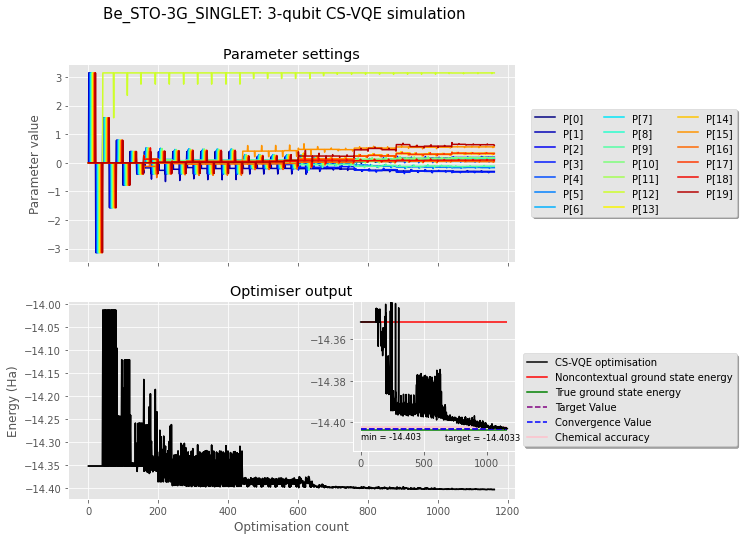

In [8]:
cs_vqe_results = mol_circ.CS_VQE(anz_terms=uccsd, 
                                 num_sim_q=num_sim_q, 
                                 optimizer=IMFIL(maxiter=10000), 
                                 param_bound=np.pi,
                                 noise=False)

title = '%s: %i-qubit CS-VQE simulation' % (speciesname, num_sim_q)
fig = plot.plot_parameter_settings(cs_vqe_results, title=title)

In [16]:
full_qc = mol_circ.full_uccsd(uccsd)

In [17]:
ham

{'IIIII': -8.67200737862642,
 'ZIIII': -0.29686495248710154,
 'IZIII': -0.2968649524871012,
 'ZZIII': 0.38923559303374466,
 'IIZII': -0.29686495248710104,
 'ZIZII': 0.3892355930337418,
 'IZZII': 0.3892355930337431,
 'ZZZII': 0.26346920025692444,
 'IIIZI': -0.04669169228823419,
 'ZIIZI': 0.1830962071070607,
 'IZIZI': 0.18309620710706104,
 'ZZIZI': 0.280714648584383,
 'IIZZI': 0.1830962071070611,
 'ZIZZI': 0.2807146485843826,
 'IZZZI': 0.2807146485843837,
 'ZZZZI': 2.243229244264411,
 'IIIIZ': -0.046691692288233576,
 'ZIIIZ': 0.18309620710706068,
 'IZIIZ': 0.18309620710706068,
 'ZZIIZ': 0.28071464858438283,
 'IIZIZ': 0.18309620710706073,
 'ZIZIZ': 0.28071464858438305,
 'IZZIZ': 0.280714648584383,
 'ZZZIZ': 2.2432292442644104,
 'IIIZZ': 0.6698678645034264,
 'ZIIZZ': 8.135853102331225e-16,
 'IZIZZ': 6.418476861114186e-17,
 'ZZIZZ': 1.97758476261356e-16,
 'IIZZZ': -1.3010426069826053e-16,
 'ZIZZZ': 1.97758476261356e-16,
 'IZZZZ': -2.3245294578089215e-16,
 'ZZZZZ': 0.28561815412509123,
 'XII

In [23]:
seed = 42
backend = Aer.get_backend('statevector_simulator')
qi = QuantumInstance(backend=backend, seed_simulator=seed, seed_transpiler=seed)

In [49]:
uccsd

{'XIIII': 8.470329472543003e-22,
 'YIIII': -0.00021161246508047394,
 'XZIII': 8.470329472543003e-22,
 'YZIII': 8.470329472543003e-22,
 'XIZII': -8.470329472543003e-22,
 'YIZII': -8.470329472543003e-22,
 'XZZII': -8.470329472543003e-22,
 'YZZII': -8.470329472543003e-22,
 'XIIZI': -8.470329472543003e-22,
 'YIIZI': 8.470329472543003e-22,
 'XZIZI': -8.470329472543003e-22,
 'YZIZI': -8.470329472543003e-22,
 'XIZZI': -8.470329472543003e-22,
 'YIZZI': 8.470329472543003e-22,
 'XZZZI': 8.470329472543003e-22,
 'YZZZI': 0.00021161246508047394,
 'XIIIZ': -8.470329472543003e-22,
 'YIIIZ': 8.470329472543003e-22,
 'XZIIZ': 8.470329472543003e-22,
 'YZIIZ': -8.470329472543003e-22,
 'XIZIZ': -8.470329472543003e-22,
 'YIZIZ': 8.470329472543003e-22,
 'XZZIZ': -8.470329472543003e-22,
 'YZZIZ': 0.00021161246508047394,
 'XIIZZ': -8.470329472543003e-22,
 'YIIZZ': -0.00021161246508047394,
 'XZIZZ': -8.470329472543003e-22,
 'YZIZZ': -8.470329472543003e-22,
 'XIZZZ': 8.470329472543003e-22,
 'YIZZZ': 8.4703294725

In [36]:
init_anz_params = np.array(list(uccsd.values()))
bounds = np.array([(a-np.pi, a+np.pi) for a in uccsd.values()])
full_qc.parameter_bounds = bounds

In [45]:
vqe = VQE(full_qc, initial_point=init_anz_params, optimizer=IMFIL(maxiter=10000), quantum_instance=qi)

In [46]:
ham_q = qonvert.dict_to_WeightedPauliOperator(ham)
vqe_run = vqe.compute_minimum_eigenvalue(operator=ham_q)
vqe_out = vqe_run.optimal_value

In [47]:
vqe_out

-10.07434308580438

In [48]:
la.get_ground_state(ham_q.to_matrix())[0]

-14.403655108067733